In [8]:
## import libraries

import os
import random
import zlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from PIL import Image
from scipy.ndimage import gaussian_filter
from skimage.feature import canny
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from scipy.ndimage import gaussian_filter
from skimage.draw import line as draw_line

import json

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from typing import Tuple, Optional

from PIL import Image
import statsmodels.formula.api as smf

In [9]:
## define filepaths

project_path =  Path().resolve().parent #os.path.dirname(os.getcwd())
tables_path = os.path.join(project_path, "015_tables")
raw_data_path = os.path.join(project_path, "000_raw_data")
raw_data_path_interface = os.path.join(raw_data_path, "interface")
raw_data_path_drawings = os.path.join(raw_data_path, "drawings") 
viz_path = os.path.join(project_path, "020_visualizations")
VIZ_PATH = viz_path

print(project_path)

E:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis


In [10]:
# Automatically reload updated code from utils/*.py every time you run a cell
%load_ext autoreload
%autoreload 2

# Add the parent directory to the Python path (only needed if utils is not already importable)
import sys
from pathlib import Path
if str(project_path) not in sys.path:
    sys.path.append(str(project_path))

from utils.utils import *
from utils.detail_feature import *
from utils.viz import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,participant_code,condition_code,condition_name,condition_hz,condition_type,stimulus_type,trialn,png_filename,json_filename,focal_x_norm,focal_y_norm,detail_raw,detail,r_directionality_raw,r_directionality,theta_directionality_raw,theta_directionality
0,dVs115,1,11 Hz,11,EXPERIMENTAL,LIGHT,1,participant_Vs115_condition_1_trialn_1.png,NaN,0.0,0.0,0.007244,0.942455,0.420562,0.721800,0.114847,0.128900
1,dVs115,1,11 Hz,11,EXPERIMENTAL,LIGHT,10,participant_Vs115_condition_1_trialn_10.png,NaN,0.0,0.0,0.007565,0.984167,0.424910,0.729262,0.171152,0.192095
2,dVs115,1,11 Hz,11,EXPERIMENTAL,LIGHT,2,participant_Vs115_condition_1_trialn_2.png,NaN,0.0,0.0,0.007561,0.983621,0.301353,0.517205,0.296943,0.333279
3,dVs115,4,40 Hz,40,EXPERIMENTAL,LIGHT,6,participant_Vs115_condition_4_trialn_6.png,NaN,0.0,0.0,0.003040,0.395481,0.072273,0.124041,0.673248,0.755630
4,dVs115,4,40 Hz,40,EXPERIMENTAL,LIGHT,7,participant_Vs115_condition_4_trialn_7.png,NaN,0.0,0.0,0.006262,0.814638,0.064700,0.111044,0.469716,0.527193


,participant_code,condition_code,condition_name,condition_hz,condition_type,stimulus_type,trialn,png_filename,json_filename,focal_x_norm,...,detail_raw,detail,r_directionality_raw,r_directionality,theta_directionality_raw,theta_directionality,brightness_raw,brightness,contrast_raw,contrast
0,i43xxx,1,11 Hz,11,EXPERIMENTAL,LIGHT,1,participant_43xxx_condition_1_trialn_1_2025-03...,participant_43xxx_condition_1_trialn_1_2025-03...,0.0,...,0.024877,0.332708,0.047443,0.062835,0.586038,0.613004,0.753038,0.753038,0.103220,0.103220
1,i43xxx,1,11 Hz,11,EXPERIMENTAL,LIGHT,3,participant_43xxx_condition_1_trialn_3_2025-03...,participant_43xxx_condition_1_trialn_3_2025-03...,0.0,...,0.020766,0.277721,0.410510,0.543690,0.159178,0.166503,0.817409,0.817409,0.110428,0.110428
2,i43xxx,1,11 Hz,11,EXPERIMENTAL,LIGHT,6,participant_43xxx_condition_1_trialn_6_2025-03...,participant_43xxx_condition_1_trialn_6_2025-03...,0.0,...,0.008397,0.112298,0.279650,0.370376,0.293587,0.307097,0.734227,0.734227,0.083425,0.083425
3,i43xxx,4,40 Hz,40,EXPERIMENTAL,LIGHT,2,participant_43xxx_condition_4_trialn_2_2025-03...,participant_43xxx_condition_4_trialn_2_2025-03...,0.0,...,0.025045,0.334953,0.088722,0.117506,0.389592,0.407519,0.815961,0.815961,0.093952,0.093952
4,i43xxx,4,40 Hz,40,EXPERIMENTAL,LIGHT,8,participant_43xxx_condition_4_trialn_8_2025-03...,participant_43xxx_condition_4_trialn_8_2025-03...,0.0,...,0.047943,0.641194,0.192315,0.254706,0.335104,0.350524,0.680015,0.680015,0.044686,0.044686


,condition_code,condition_name,png_filename,json_filename,focal_x_norm,focal_y_norm,detail_raw,detail,r_directionality_raw,r_directionality,theta_directionality_raw,theta_directionality
0,A,Image A,IMG_A.png,NaN,0.00,0.00,0.005106,0.664250,0.000356,0.000610,0.998868,1.121096
1,B,Image B,IMG_B.png,NaN,-0.88,0.68,0.005954,0.774639,0.443004,0.760316,0.149568,0.167870
2,C,Image C,IMG_C.png,NaN,0.50,0.55,0.002629,0.342014,0.036809,0.063174,0.691843,0.776501


,condition_code,condition_name,png_filename,json_filename,focal_x_norm,focal_y_norm,detail_raw,detail,r_directionality_raw,r_directionality,theta_directionality_raw,theta_directionality,brightness_raw,brightness,contrast_raw,contrast
0,A,Image A,IMG_A.png,IMG_A.json,-0.360,-0.350,0.002073,0.027725,0.088140,0.116735,0.476371,0.498291,0.311670,0.311670,0.059049,0.059049
1,B,Image B,IMG_B.png,IMG_B.json,0.560,0.365,0.009205,0.123115,0.358915,0.475356,0.231099,0.241733,0.714712,0.714712,0.118057,0.118057
2,C,Image C,IMG_C.png,IMG_C.json,0.565,-0.575,0.115402,1.543395,0.258157,0.341910,0.332536,0.347837,0.574791,0.574791,0.468261,0.468261



Random samples from Drawings dataset:


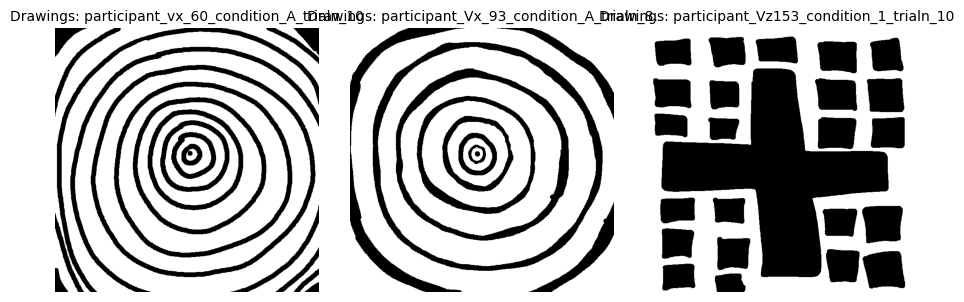


Random samples from Interface dataset:


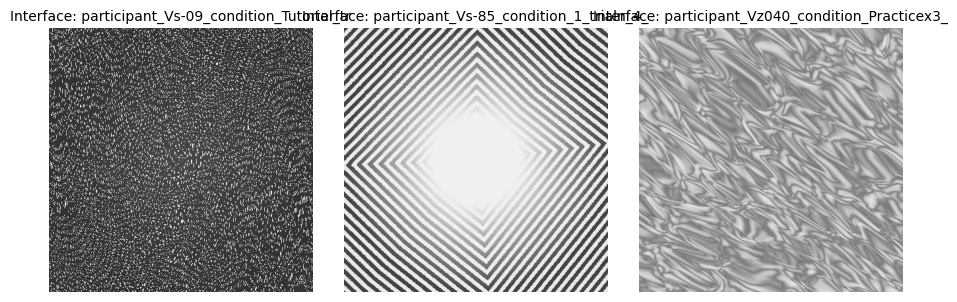


Random samples from Drawings Targets dataset:


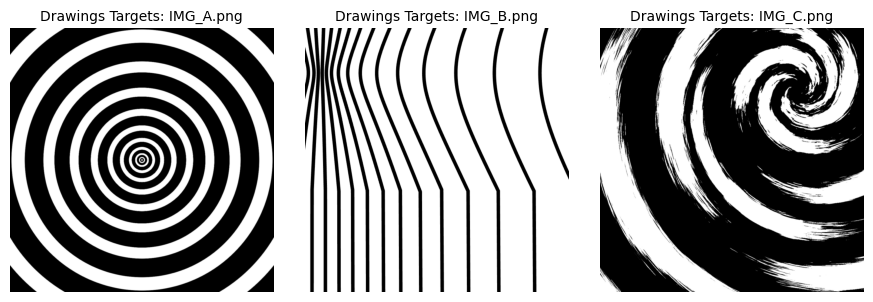


Random samples from Interface Targets dataset:


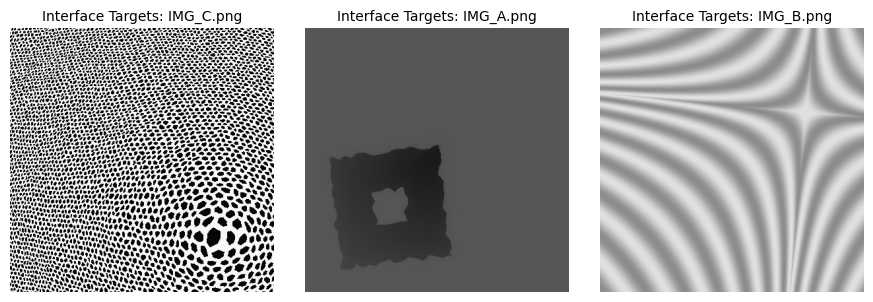

In [11]:
targs_path = os.path.join(project_path, "001_target_images")
targs_path_drawings = os.path.join(targs_path, "drawings")
targs_path_interface = os.path.join(targs_path, "interface")

# Paths to CSV files
drawings_csv_path = os.path.join(tables_path, "drawings_features.csv")
interface_csv_path = os.path.join(tables_path, "interface_features.csv")
drawings_targets_csv_path = os.path.join(tables_path, "drawings_targets_features.csv")
interface_targets_csv_path = os.path.join(tables_path, "interface_targets_features.csv")

# Read CSVs
df_drawings = pd.read_csv(drawings_csv_path)
df_interface = pd.read_csv(interface_csv_path)
df_drawings_targets = pd.read_csv(drawings_targets_csv_path)
df_interface_targets = pd.read_csv(interface_targets_csv_path)

# Display first few rows of each for a quick check
display(df_drawings.head())
display(df_interface.head())
display(df_drawings_targets.head())
display(df_interface_targets.head())

# Save all four datasets to a dictionary
datasets = {
    "drawings_targets": {
        "name": "Drawings Targets",
        "df_raw": df_drawings_targets,
        "image_path": targs_path_drawings
    },
    "interface_targets": {
        "name": "Interface Targets",
        "df_raw": df_interface_targets,
        "image_path": targs_path_interface
    },
    "drawings": {
        "name": "Drawings",
        "df_raw": df_drawings,
        "image_path": raw_data_path_drawings
    },
    "interface": {
        "name": "Interface",
        "df_raw": df_interface,
        "image_path": raw_data_path_interface
    },
}

# Visualize random samples from each
show_random_images("drawings", datasets)
show_random_images("interface", datasets)
show_random_images("drawings_targets", datasets)
show_random_images("interface_targets", datasets)



## Testing correlation between target images and recreation images features

In [12]:
def model_summary_string(mdf, var, precision=3):
    b = mdf.params[var]
    se = mdf.bse[var]
    p = mdf.pvalues[var]
    if p < 0.0001:
        p_str = "p < .0001"
    elif p < 0.001:
        # Avoid "p = .000"
        p_str = "p < .001"
    else:
        p_str = f"p = {p:.3f}".replace("0.", ".")
    return f"b = {b:.{precision}f}, SE = {se:.{precision}f}, {p_str}"

e:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
e:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
e:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
e:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
e:\Research2\PSYCHEMORPH_JAVASCRIPT\data_analysis\.venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:223

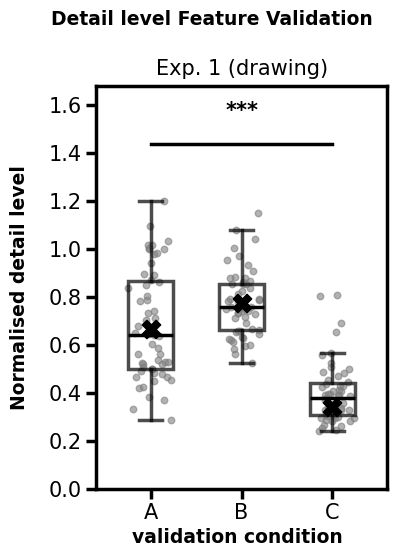

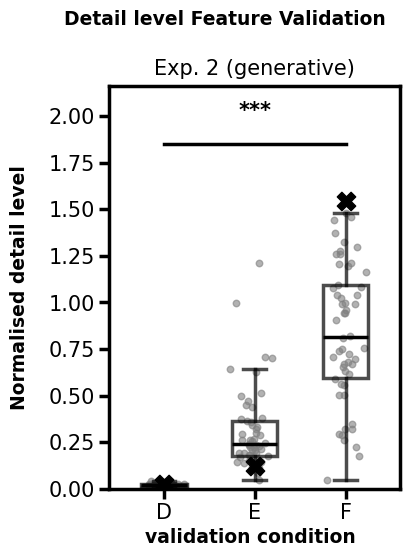

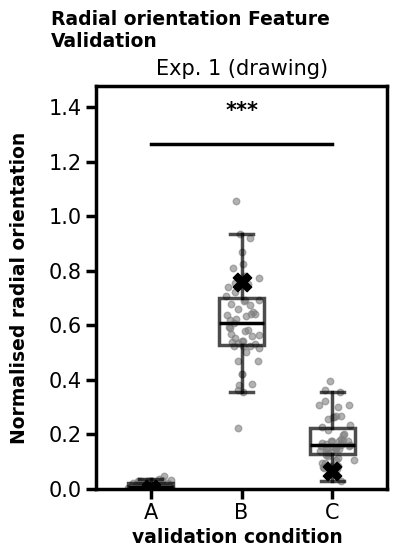

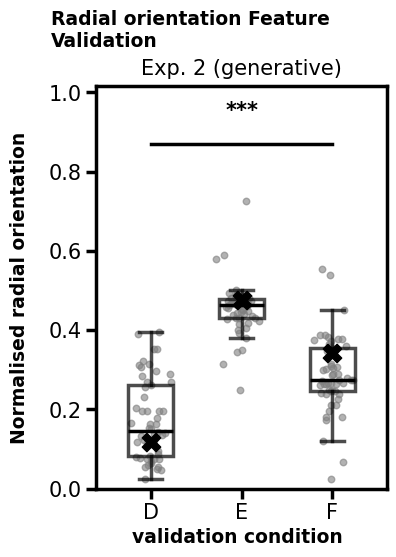

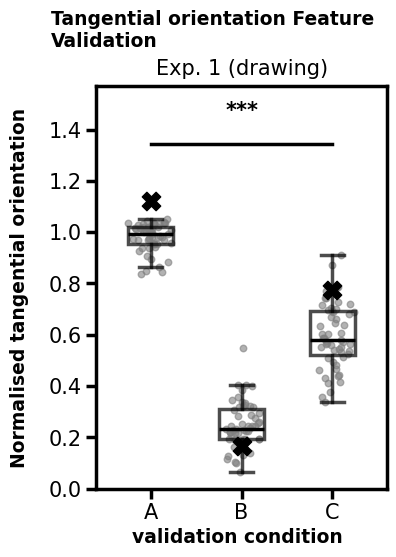

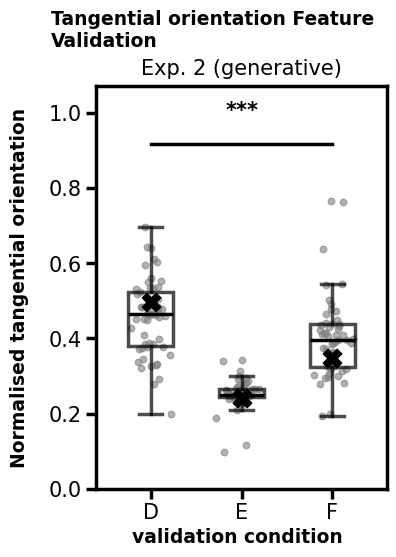

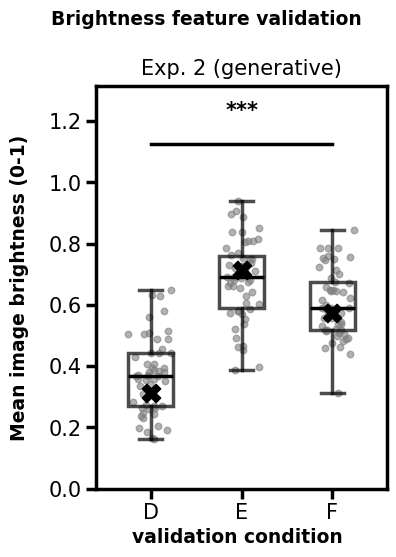

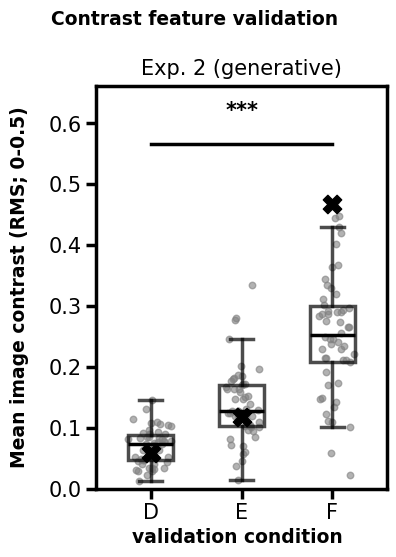


================ APA reporting strings (Holm–Bonferroni corrected) ================

Detail level validation (Experiment 1: b = 0.865, SE = 0.068, z = 12.65, p < .001)
Detail level validation (Experiment 2: b = 0.463, SE = 0.030, z = 15.37, p < .001)

Radial orientation validation (Experiment 1: b = 0.726, SE = 0.025, z = 28.65, p < .001)
Radial orientation validation (Experiment 2: b = 0.758, SE = 0.048, z = 15.88, p < .001)

Tangential orientation validation (Experiment 1: b = 0.746, SE = 0.022, z = 34.55, p < .001)
Tangential orientation validation (Experiment 2: b = 0.767, SE = 0.069, z = 11.15, p < .001)

Brightness validation (Experiment 2: b = 0.791, SE = 0.057, z = 13.99, p < .001)

Contrast validation (Experiment 2: b = 0.412, SE = 0.031, z = 13.40, p < .001)


================ Full results table (raw and Holm–Bonferroni adjusted) ================



,family,experiment,feature,term,b,se,z,p_raw,p_adj,converged,re_var
0,validation_exp1,drawings,detail,detail_targ,0.865193,0.068384,12.651915,1.091812e-36,1.091812e-36,True,2.172697e-03
1,validation_exp1,drawings,r_directionality,r_directionality_targ,0.726108,0.025343,28.650946,1.560140e-180,3.120279e-180,True,7.842002e-05
2,validation_exp1,drawings,theta_directionality,theta_directionality_targ,0.745665,0.021580,34.554072,1.238125e-261,3.714374e-261,True,8.741604e-11
3,validation_exp2,interface,brightness,brightness_targ,0.791117,0.056532,13.994076,1.694181e-44,5.082544e-44,True,6.473408e-09
4,validation_exp2,interface,contrast,contrast_targ,0.412102,0.030750,13.401830,5.899023e-41,1.179805e-40,True,1.443622e-11
5,validation_exp2,interface,detail,detail_targ,0.463151,0.030140,15.366739,2.735971e-53,1.094388e-52,True,1.662976e-11
6,validation_exp2,interface,r_directionality,r_directionality_targ,0.758250,0.047749,15.879867,8.736380e-57,4.368190e-56,True,3.725657e-04
7,validation_exp2,interface,theta_directionality,theta_directionality_targ,0.766600,0.068766,11.147979,7.325150e-29,7.325150e-29,True,1.301054e-04


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

text_size = 17
main_title_size = text_size * 1.2
labelpad = 20

# ============================================================
# Helpers: APA formatting + Holm–Bonferroni
# ============================================================

def _fmt_num(x, digits=3):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return "NA"
    return f"{x:.{digits}f}"

def _fmt_p_apa(p, *, threshold=0.001, digits=3):
    """
    APA: use leading dot (e.g., p = .023), and use p < .001 when very small.
    """
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return "p = NA"
    if p < threshold:
        return "p < .001"
    pr = round(float(p), digits)
    s = f"{pr:.{digits}f}"
    if s.startswith("0"):
        s = s[1:]
    return f"p = {s}"

def pval_to_marker(p):
    # markers should reflect the (corrected) p-values you pass in
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return "NA"
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return "NS"

def holm_bonferroni_adjust(pvals):
    """
    Holm–Bonferroni adjusted p-values (step-down), returned in original order.
    """
    pvals = np.asarray(pvals, dtype=float)
    m = len(pvals)
    order = np.argsort(pvals)
    ranked = pvals[order]

    adj_ranked = np.empty(m, dtype=float)
    running_max = 0.0
    for j, p in enumerate(ranked, start=1):
        adj = (m - j + 1) * p
        if adj > running_max:
            running_max = adj
        adj_ranked[j - 1] = min(running_max, 1.0)

    out = np.empty(m, dtype=float)
    out[order] = adj_ranked
    return out

def apa_effect_string(b, se, z, p, *, digits_bse=3, digits_z=2):
    # Example: "b = 0.108, SE = 0.019, z = 5.68, p < .001"
    return f"b = {_fmt_num(b, digits_bse)}, SE = {_fmt_num(se, digits_bse)}, z = {_fmt_num(z, digits_z)}, {_fmt_p_apa(p)}"

# ============================================================
# Original data prep + model fitting (kept intact, with minor extensions)
# ============================================================

def prepare_data(feature, experiment):
    valid_codes = ['A', 'B', 'C']
    if experiment == 'drawings':
        df_rec = df_drawings
        df_targ = df_drawings_targets
    elif experiment == 'interface':
        df_rec = df_interface
        df_targ = df_interface_targets
    else:
        raise ValueError("experiment must be 'drawings' or 'interface'")

    df_rec_sub = df_rec[df_rec['condition_code'].isin(valid_codes)].copy()
    df_rec_sub = df_rec_sub[['condition_code', feature, 'participant_code']].rename(
        columns={feature: f"{feature}_rec"}
    )
    df_rec_sub['experiment'] = experiment

    df_targ_sub = df_targ[df_targ['condition_code'].isin(valid_codes)].copy()
    df_targ_sub = df_targ_sub[['condition_code', feature]].rename(
        columns={feature: f"{feature}_targ"}
    )
    df_targ_sub['experiment'] = experiment

    df_merged = pd.merge(
        df_rec_sub,
        df_targ_sub,
        on=['condition_code', 'experiment'],
        how='left'
    )
    df_merged['cond_exp'] = df_merged['experiment'] + '_' + df_merged['condition_code']
    return df_merged

def run_mixedlm(feature, df):
    """
    MixedLM: recreation feature ~ target feature, random intercept for participant.
    Tries multiple optimizers if the default fails to converge.
    """
    rec_col = f"{feature}_rec"
    targ_col = f"{feature}_targ"

    md = smf.mixedlm(f"{rec_col} ~ {targ_col}", df, groups=df["participant_code"])

    # Try a few optimizers; keep the first converged fit
    methods = ["lbfgs", "bfgs", "cg", "powell", "nm"]
    last_mdf = None
    for meth in methods:
        try:
            mdf = md.fit(reml=False, method=meth, maxiter=2000, disp=False)
            last_mdf = mdf
            if getattr(mdf, "converged", False):
                break
        except Exception:
            continue

    if last_mdf is None:
        raise RuntimeError("MixedLM fit failed for all optimizers.")

    mdf = last_mdf
    converged = getattr(mdf, "converged", None)

    re_var = np.nan
    try:
        if hasattr(mdf, "cov_re") and mdf.cov_re is not None and mdf.cov_re.size:
            re_var = float(mdf.cov_re.iloc[0, 0])
    except Exception:
        re_var = np.nan

    b  = float(mdf.params.get(targ_col, np.nan))
    se = float(mdf.bse.get(targ_col, np.nan))
    z  = float(mdf.tvalues.get(targ_col, np.nan))
    p  = float(mdf.pvalues.get(targ_col, np.nan))

    return mdf, b, se, z, p, converged, re_var

# ============================================================
# Labels (unchanged)
# ============================================================

EXP_LABELS = {
    'drawings':  "Experiment 1",
    'interface': "Experiment 2"
}

XTICK_LABELS = {
    'drawings': ['A', 'B', 'C'],
    'interface': ['D', 'E', 'F']
}

SUBPLOT_LABELS = {
    'drawings':  "Exp. 1 (drawing)",
    'interface': "Exp. 2 (generative)"
}

# ============================================================
# Plot scaling helpers (unchanged)
# ============================================================

def _compute_y_params_for_experiment(df, rec_col, targ_col):
    all_rec = df[rec_col].to_numpy(dtype=float)
    all_targ = df[targ_col].to_numpy(dtype=float)
    if (all_rec.size + all_targ.size) > 0:
        all_vals = np.concatenate([
            all_rec[~np.isnan(all_rec)],
            all_targ[~np.isnan(all_targ)]
        ])
    else:
        all_vals = np.array([0.0])

    y_min = 0.0
    y_max = np.nanmax(all_vals) if all_vals.size > 0 else 1.0
    if not np.isfinite(y_max):
        y_max = 1.0
    y_range = y_max - y_min
    if y_range <= 0:
        y_range = 1.0

    y_pad = y_range * 0.40
    y_lims = (0.0, y_max + y_pad)
    y_sig = y_max + y_pad * 0.50
    y_text = y_max + y_pad * 0.70
    return y_lims, y_sig, y_text

# ============================================================
# Plotting (now uses corrected p-values for markers)
# ============================================================

def plot_feature_combined(feature, dfs, plot_meta, mdfs, feature_name, y_ax):
    """
    plot_meta[exp] must contain corrected p-values for markers:
      - p_adj

    Updated: now produces two separate single-panel figures (Exp 1 and Exp 2),
    each formatted like plot_feature_single (same sizing/spacing/styling),
    using SUBPLOT_LABELS for the per-panel title (no extra fig.text experiment annotation).
    """

    rec_col = f"{feature}_rec"
    targ_col = f"{feature}_targ"
    conds = ['A', 'B', 'C']
    jitter = 0.1
    rng = np.random.RandomState(0)

    # Match the single-panel function's layout parameters
    text_size_local = 15
    main_title_size_local = text_size_local * 0.9
    labelpad_local = 14

    title_str = f"{feature_name} Feature Validation"

    for exp in ['drawings', 'interface']:
        df = dfs[exp]
        mdf = mdfs[exp]  # kept for signature compatibility (not otherwise used, as in your original)
        p_adj = plot_meta[exp]["p_adj"]

        fig, ax = plt.subplots(1, 1, figsize=(3.75, 6.1))

        y_lims, y_sig, y_text = _compute_y_params_for_experiment(df, rec_col, targ_col)
        xticks = [1, 2, 3]
        xticklabels = XTICK_LABELS.get(exp, ['a', 'b', 'c'])

        fig.text(0.005, 0.975, title_str, fontsize=main_title_size_local, fontweight="bold",
                 va="top", ha="left", wrap=True)

        # Scatter: recreation
        for j, cond in enumerate(conds):
            sub = df[df['condition_code'] == cond]
            if sub.empty:
                continue
            xs = (j + 1) + rng.normal(0, jitter, size=len(sub))
            ax.scatter(xs, sub[rec_col], alpha=0.6, s=22, marker='o', c='gray')

        # Scatter: stimulus
        for j, cond in enumerate(conds):
            sub = df[df['condition_code'] == cond]
            if sub.empty:
                continue
            x = j + 1
            y = sub[targ_col].iloc[0]
            ax.scatter(x, y, s=175, marker='X', c='black')

        # Boxplot overlay
        data_by_cat = [df[df['condition_code'] == cond][rec_col].values for cond in conds]
        ax.boxplot(
            data_by_cat,
            positions=[1, 2, 3],
            widths=0.5,
            patch_artist=True,
            showfliers=False,
            boxprops={'facecolor': 'none', 'edgecolor': 'black', 'alpha': 0.7, 'linewidth': 2.5},
            whiskerprops={'color': 'black', 'alpha': 0.7, 'linewidth': 2.5},
            capprops={'color': 'black', 'alpha': 0.7, 'linewidth': 2.5},
            medianprops={'color': 'black', 'linewidth': 2.5}
        )

        ax.set_xlim(0.4, 3.6)
        ax.set_ylim(*y_lims)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, fontsize=text_size_local)
        ax.set_ylabel(y_ax, fontsize=main_title_size_local, fontweight="bold", labelpad=labelpad_local)
        ax.tick_params(axis='y', labelsize=text_size_local, width=2.5, length=7)
        ax.tick_params(axis='x', labelsize=text_size_local, width=2.5, length=7)

        # Per-panel title (this is where Exp 1/2 labelling should live)
        ax.set_title(SUBPLOT_LABELS[exp], fontsize=text_size_local, pad=8)

        # Significance marker (corrected)
        ax.plot([1, 3], [y_sig, y_sig], c='black', lw=2.5)
        ax.text(2, y_text, pval_to_marker(p_adj), ha='center', va='bottom',
                fontsize=text_size_local, fontweight='bold')

        for spine in ax.spines.values():
            spine.set_linewidth(2.5)

        fig.subplots_adjust(bottom=0.19, top=0.85)
        fig.text(0.5, 0.11, 'validation condition', ha='center', va='center',
                 fontsize=main_title_size_local, fontweight="bold")
        plt.show()

def plot_feature_single(feature, df, plot_meta, feature_name, y_ax):
    """
    Single-panel version for generative-only features (brightness, contrast).
    plot_meta must contain corrected p-values for markers: p_adj
    """
    text_size = 15
    main_title_size = text_size * 0.9
    labelpad = 14

    rec_col = f"{feature}_rec"
    targ_col = f"{feature}_targ"
    conds = ['A', 'B', 'C']
    jitter = 0.1
    rng = np.random.RandomState(0)

    fig, ax = plt.subplots(1, 1, figsize=(3.75, 6.1))

    y_lims, y_sig, y_text = _compute_y_params_for_experiment(df, rec_col, targ_col)
    xticks = [1, 2, 3]
    xticklabels = XTICK_LABELS.get('interface', ['D', 'E', 'F'])

    title_str = f"{feature_name} feature validation"
    fig.text(0.005, 0.975, title_str, fontsize=main_title_size, fontweight="bold",
             va="top", ha="left", wrap=True)

    # Scatter: recreation
    for j, cond in enumerate(conds):
        sub = df[df['condition_code'] == cond]
        if sub.empty:
            continue
        xs = (j + 1) + rng.normal(0, jitter, size=len(sub))
        ax.scatter(xs, sub[rec_col], alpha=0.6, s=22, marker='o', c='gray')

    # Scatter: stimulus
    for j, cond in enumerate(conds):
        sub = df[df['condition_code'] == cond]
        if sub.empty:
            continue
        x = j + 1
        y = sub[targ_col].iloc[0]
        ax.scatter(x, y, s=175, marker='X', c='black')

    data_by_cat = [df[df['condition_code'] == cond][rec_col].values for cond in conds]
    ax.boxplot(
        data_by_cat,
        positions=[1, 2, 3],
        widths=0.5,
        patch_artist=True,
        showfliers=False,
        boxprops={'facecolor': 'none', 'edgecolor': 'black', 'alpha': 0.7, 'linewidth': 2.5},
        whiskerprops={'color': 'black', 'alpha': 0.7, 'linewidth': 2.5},
        capprops={'color': 'black', 'alpha': 0.7, 'linewidth': 2.5},
        medianprops={'color': 'black', 'linewidth': 2.5}
    )

    ax.set_xlim(0.4, 3.6)
    ax.set_ylim(*y_lims)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, fontsize=text_size)
    ax.set_ylabel(y_ax, fontsize=main_title_size, fontweight="bold", labelpad=labelpad)
    ax.tick_params(axis='y', labelsize=text_size, width=2.5, length=7)
    ax.tick_params(axis='x', labelsize=text_size, width=2.5, length=7)

    ax.set_title(SUBPLOT_LABELS['interface'], fontsize=text_size, pad=8)

    # Significance marker (corrected)
    p_adj = plot_meta["p_adj"]
    ax.plot([1, 3], [y_sig, y_sig], c='black', lw=2.5)
    ax.text(2, y_text, pval_to_marker(p_adj), ha='center', va='bottom',
            fontsize=text_size, fontweight='bold')

    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    fig.subplots_adjust(bottom=0.19, top=0.85)
    fig.text(0.5, 0.11, 'validation condition', ha='center', va='center', fontsize=main_title_size, fontweight="bold")
    plt.show()

# ============================================================
# Master: run ALL stats -> Holm per experiment -> plot -> APA strings -> table
# ============================================================

def run_full_validation():
    features = [
        ("detail",               "Detail level",           "Normalised detail level",            False),
        ("r_directionality",     "Radial orientation",     "Normalised radial orientation",      False),
        ("theta_directionality", "Tangential orientation", "Normalised tangential orientation",  False),
        ("brightness",           "Brightness",             "Mean image brightness (0-1)",              True),
        ("contrast",             "Contrast",               "Mean image contrast (RMS; 0-0.5)",                True),
    ]

    # --------------------------------------------------------
    # 1) FIT ALL MODELS FIRST (no plotting, no printing)
    # --------------------------------------------------------
    rows = []
    fitted = {"drawings": {}, "interface": {}}

    for feature, feature_name, y_label, gen_only in features:
        # Experiment 1 only if not generative-only
        if not gen_only:
            df = prepare_data(feature, 'drawings')
            mdf, b, se, z, p, converged, re_var = run_mixedlm(feature, df)
            fitted["drawings"][feature] = {"df": df, "mdf": mdf, "feature_name": feature_name, "y_label": y_label}
            rows.append({
                "family": "validation_exp1",
                "experiment": "drawings",
                "feature": feature,
                "feature_name": feature_name,
                "term": f"{feature}_targ",
                "b": b, "se": se, "z": z, "p_raw": p,
                "converged": converged,
                "re_var": re_var,
            })

        # Experiment 2 always
        df = prepare_data(feature, 'interface')
        mdf, b, se, z, p, converged, re_var = run_mixedlm(feature, df)
        fitted["interface"][feature] = {"df": df, "mdf": mdf, "feature_name": feature_name, "y_label": y_label}
        rows.append({
            "family": "validation_exp2",
            "experiment": "interface",
            "feature": feature,
            "feature_name": feature_name,
            "term": f"{feature}_targ",
            "b": b, "se": se, "z": z, "p_raw": p,
            "converged": converged,
            "re_var": re_var,
        })

    results = pd.DataFrame(rows)

    # --------------------------------------------------------
    # 2) HOLM–BONFERRONI WITHIN EACH EXPERIMENT FAMILY
    # --------------------------------------------------------
    results["p_adj"] = np.nan
    for fam in ["validation_exp1", "validation_exp2"]:
        idx = results["family"] == fam
        pvals = results.loc[idx, "p_raw"].to_numpy(dtype=float)
        results.loc[idx, "p_adj"] = holm_bonferroni_adjust(pvals)

    # --------------------------------------------------------
    # 3) PLOTTING (now uses corrected p-values for markers)
    # --------------------------------------------------------
    # combined plots for shared features
    for feature, feature_name, y_label, gen_only in features:
        if gen_only:
            continue

        dfs = {
            "drawings":  fitted["drawings"][feature]["df"],
            "interface": fitted["interface"][feature]["df"]
        }
        mdfs = {
            "drawings":  fitted["drawings"][feature]["mdf"],
            "interface": fitted["interface"][feature]["mdf"]
        }

        # corrected p-values for markers
        p_adj_draw = float(results[(results["experiment"] == "drawings") & (results["feature"] == feature)]["p_adj"].iloc[0])
        p_adj_int  = float(results[(results["experiment"] == "interface") & (results["feature"] == feature)]["p_adj"].iloc[0])

        plot_meta = {
            "drawings":  {"p_adj": p_adj_draw},
            "interface": {"p_adj": p_adj_int}
        }

        plot_feature_combined(feature, dfs, plot_meta, mdfs, feature_name, y_label)

    # single plots for generative-only (Exp2 only)
    for feature, feature_name, y_label, gen_only in features:
        if not gen_only:
            continue

        df = fitted["interface"][feature]["df"]
        p_adj = float(results[(results["experiment"] == "interface") & (results["feature"] == feature)]["p_adj"].iloc[0])
        plot_meta = {"p_adj": p_adj}
        plot_feature_single(feature, df, plot_meta, feature_name, y_label)

    # --------------------------------------------------------
    # 4) APA-COMPLIANT PRINT-OUT STRINGS (NO OLD PRINTS)
    # --------------------------------------------------------
    print("\n================ APA reporting strings (Holm–Bonferroni corrected) ================\n")

    for feature, feature_name, y_label, gen_only in features:
        # Experiment 1 (if applicable)
        if not gen_only:
            r1 = results[(results["experiment"] == "drawings") & (results["feature"] == feature)].iloc[0]
            print(f"{feature_name} validation (Experiment 1: {apa_effect_string(r1['b'], r1['se'], r1['z'], r1['p_adj'])})")

        # Experiment 2
        r2 = results[(results["experiment"] == "interface") & (results["feature"] == feature)].iloc[0]
        print(f"{feature_name} validation (Experiment 2: {apa_effect_string(r2['b'], r2['se'], r2['z'], r2['p_adj'])})")
        print("")

    # --------------------------------------------------------
    # 5) FULL RESULTS TABLE (raw + adjusted; no special formatting)
    # --------------------------------------------------------
    table = results.copy()
    table = table[[
        "family", "experiment", "feature", "term",
        "b", "se", "z", "p_raw", "p_adj",
        "converged", "re_var"
    ]].sort_values(["family", "feature", "experiment"]).reset_index(drop=True)

    print("\n================ Full results table (raw and Holm–Bonferroni adjusted) ================\n")
    display(table)

    return results, table

# ---------------- RUN ----------------
validation_long, validation_table = run_full_validation()
